In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def least_squares_analysis(y_values, x_values=None, title="Least Squares Analysis", xlab='x', ylab='y'):
    """
    Perform least squares regression, show plot with regression results,
    and display the calculation table in separate figures.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1,2,...,N.
    title : str, optional
        Title for the figures.
    xlab : str, optional
        Label for the x-axis.
    ylab : str, optional
        Label for the y-axis.
    """

    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y) + 1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit
    N = len(x)

    # --- Error Calculations ---
    # Standard error of the estimate (sigma_y)
    sigma_y = np.sqrt(np.sum(residuals**2) / (N - 2))

    # Sum of squares of x
    Sxx = np.sum((x - np.mean(x))**2)

    # Error in slope (standard error)
    err_slope = sigma_y / np.sqrt(Sxx)

    # Error in intercept (standard error)
    err_intercept = sigma_y * np.sqrt(np.sum(x**2) / (N * Sxx))

    # Create DataFrame table for display
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x * y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x * y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])

    # --- Figure 1: Regression Plot ---
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.scatter(x, y, color='blue', label="Data points")
    ax1.plot(x, y_fit, color='red', label="Best Fit Line")

    textstr = '\n'.join((
        f"Slope (m)      : {slope:.4f} ± {err_slope:.4f}",
        f"Intercept (c)  : {intercept:.4f} ± {err_intercept:.4f}",
        "",
        f"Equation: y = {slope:.4f}x + {intercept:.4f}"
    ))
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.5))

    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    ax1.legend()
    ax1.set_title(title)
    ax1.grid(True)
    fig1.tight_layout()

    # --- Figure 2: Calculation Table ---
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    ax2.axis('tight')
    ax2.axis('off')
    table_fig = ax2.table(cellText=table.round(3).values,
                          colLabels=table.columns,
                          rowLabels=table.index,
                          cellLoc='center', loc='center')
    table_fig.auto_set_font_size(False)
    table_fig.set_fontsize(12)
    table_fig.scale(1.2, 1.2)
    ax2.set_title(f"{title} - Calculation Data", pad=20)
    fig2.tight_layout()

    plt.show()

    # Return results in case needed programmatically
    return {
        "slope": slope,
        "intercept": intercept,
        "slope_error": err_slope,
        "intercept_error": err_intercept,
        "table": table
    }


### Calibration


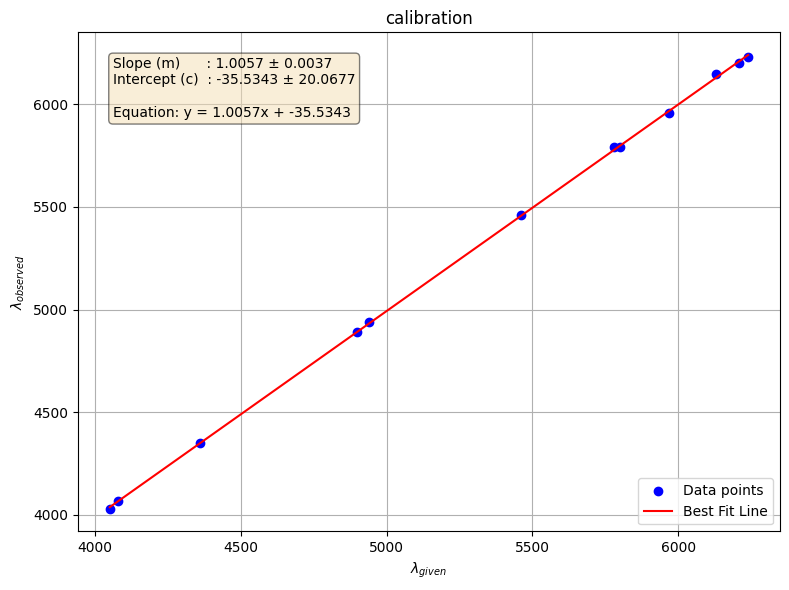

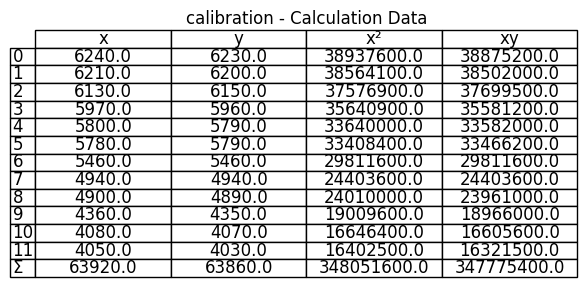

{'slope': np.float64(1.0057323494707924),
 'intercept': np.float64(-35.53431484775342),
 'slope_error': np.float64(0.0037262110796142376),
 'intercept_error': np.float64(20.067748385808),
 'table':           x        y           x²           xy
 0    6240.0   6230.0   38937600.0   38875200.0
 1    6210.0   6200.0   38564100.0   38502000.0
 2    6130.0   6150.0   37576900.0   37699500.0
 3    5970.0   5960.0   35640900.0   35581200.0
 4    5800.0   5790.0   33640000.0   33582000.0
 5    5780.0   5790.0   33408400.0   33466200.0
 6    5460.0   5460.0   29811600.0   29811600.0
 7    4940.0   4940.0   24403600.0   24403600.0
 8    4900.0   4890.0   24010000.0   23961000.0
 9    4360.0   4350.0   19009600.0   18966000.0
 10   4080.0   4070.0   16646400.0   16605600.0
 11   4050.0   4030.0   16402500.0   16321500.0
 Σ   63920.0  63860.0  348051600.0  347775400.0}

In [35]:
x1=[6230,6200,6150,5960,5790,5790,5460,4940,4890,4350,4070,4030]
y1=[6240,6210,6130,5970,5800,5780,5460,4940,4900,4360,4080,4050]

least_squares_analysis(x1,y1,title='calibration',xlab=r'$\lambda_{given}$',ylab=r'$\lambda_{observed}$')

### Copper



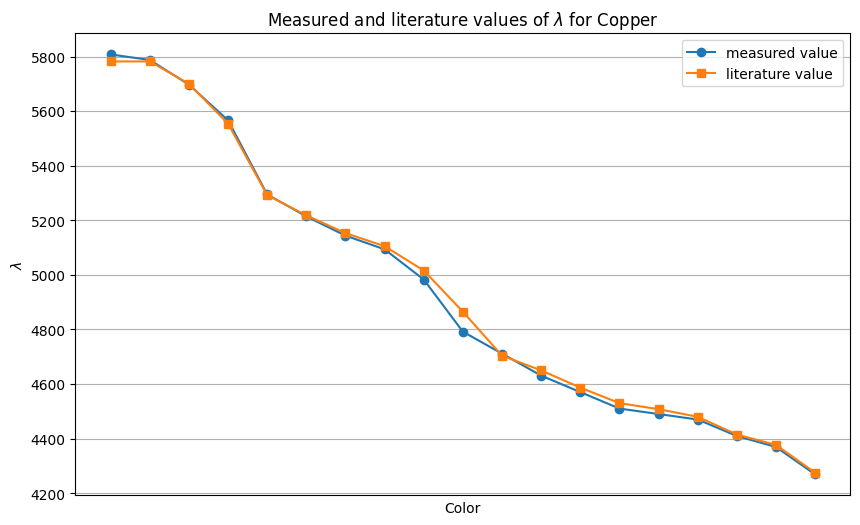

In [7]:
y2_cor=[5807.58,5787.47,5696.96,5566.21,5294.68,5214.22,5143.82,5093.54,4982.91,4791.83,4711.37,4630.91,4570.57,4510.23,4490.12,4470.00,4409.66,4369.43,4268.86]
y2_lit=[5782,5782,5700,5554,5292,5218,5153,5105,5016,4865,4704,4650,4587,4530,4508,4480,4415,4377,4275]

plt.figure(figsize=(10,6))
plt.plot(y2_cor, label='measured value', marker='o')
plt.plot(y2_lit, label='literature value', marker='s')
plt.xlabel('Color')
plt.ylabel(r'$\lambda$')
plt.title(r'Measured and literature values of $\lambda$ for Copper')
plt.legend()
plt.grid(True)
plt.xticks([])  # Remove x-axis numbers
plt.show()


### Brass

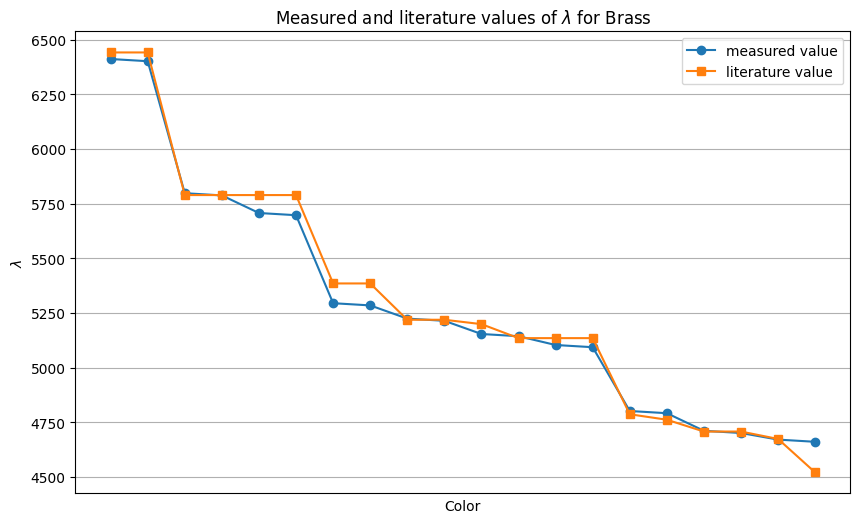

In [8]:
y2_cor=[6411.00,6400.95,5797.53,5787.47,5707.01,5696.96,5294.68,5284.62,5224.28,5214.22,5153.88,5143.82,5103.59,5093.54,4801.88,4791.83,4711.37,4701.31,4671.14,4661.08]
y2_lit=[6441,6441,5789,5789,5789,5789,5385,5385,5219,5219,5199,5135,5135,5135,4787,4762,4708,4708,4674,4521]

plt.figure(figsize=(10,6))
plt.plot(y2_cor, label='measured value', marker='o')
plt.plot(y2_lit, label='literature value', marker='s')
plt.xlabel('Color')
plt.ylabel(r'$\lambda$')
plt.title(r'Measured and literature values of $\lambda$ for Brass')
plt.legend()
plt.grid(True)
plt.xticks([])  # Remove x-axis numbers
plt.show()

### Iodine


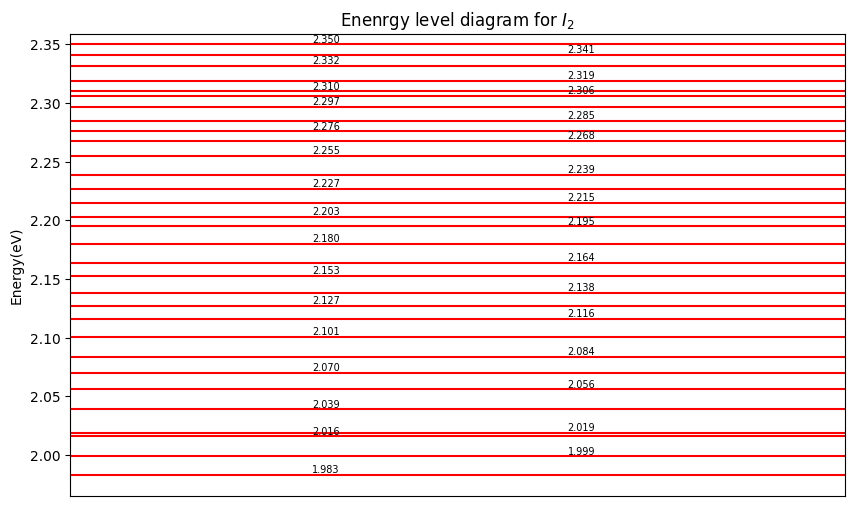

In [27]:
E=[1.983,1.999,2.016,2.019,2.039,2.056,2.070,2.084,2.101,2.116,2.127,2.138,2.153,2.164,2.180,2.195,2.203,2.215,2.227,2.239,2.255,2.268,2.276,2.285,2.297,2.306,2.310,2.319,2.332,2.341,2.350]
plt.figure(figsize=(10,6))
for i in E:
    plt.axhline(y=i, c='r')
    plt.text(0.33 + 0.33*(E.index(i)%2) , i , f"{i:.3f}", color='black', ha='center', va='bottom', fontsize=7, transform=plt.gca().get_yaxis_transform())
plt.ylabel(r'Energy(eV)')
plt.title(r'Enenrgy level diagram for $I_2$')
# plt.legend()
# plt.grid(True)
plt.xticks([])  # Remove x-axis numbers
plt.show()
